# Sales Analysis Project
### Checking historical data
### For which category has the highest Sales
### Predict Future Sales On which Product of Furniture Sales Depend Most
- Reading and understanding the data
- Clean the data
- handle unwanted Features
- Convert Categorical Data into numerical one
- Train XGBOOST Model

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [235]:
furtinure = pd.read_csv(r"C:\\Users\\kumar\\OneDrive\\Desktop\\Furniture.csv")
furtinure.head()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733


In [237]:
furtinure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2500 non-null   float64
 1   cost                 2500 non-null   float64
 2   sales                2500 non-null   int64  
 3   profit_margin        2500 non-null   float64
 4   inventory            2500 non-null   int64  
 5   discount_percentage  2500 non-null   float64
 6   delivery_days        2500 non-null   int64  
 7   category             2500 non-null   object 
 8   material             2500 non-null   object 
 9   color                2500 non-null   object 
 10  location             2500 non-null   object 
 11  season               2500 non-null   object 
 12  store_type           2500 non-null   object 
 13  brand                2500 non-null   object 
 14  revenue              2500 non-null   float64
dtypes: float64(5), int64(3), object(7)
mem

In [239]:
furtinure.isnull().sum()

price                  0
cost                   0
sales                  0
profit_margin          0
inventory              0
discount_percentage    0
delivery_days          0
category               0
material               0
color                  0
location               0
season                 0
store_type             0
brand                  0
revenue                0
dtype: int64

# Here We don't have any Null Values in Our dataset

In [242]:
furtinure.shape

(2500, 15)

In [244]:
furtinure.describe()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,revenue
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000
mean,274.495219,191.930107,24.924000,30.208571,97.715600,14.947616,4.89400,5926.853657
std,130.898452,98.590751,14.050067,11.536804,57.616228,8.621547,2.55902,6902.737604
min,50.704297,26.505895,1.000000,10.017692,0.000000,0.005556,1.00000,-14214.565505
25%,159.104890,106.399135,13.000000,20.230697,50.000000,7.760214,3.00000,1216.719195
50%,277.641809,189.336329,25.000000,30.297911,94.000000,14.915143,5.00000,5523.232714
75%,387.378046,263.188280,37.000000,40.134205,147.000000,22.292661,7.00000,10233.537982
max,499.872953,447.022911,49.000000,49.999535,199.000000,29.991229,9.00000,32922.078832


# We Don't have any Outlier in Our dataset

In [247]:
furtinure["category"].value_counts()

category
Table    533
Desk     501
Chair    497
Sofa     488
Bed      481
Name: count, dtype: int64

In [249]:
furtinure["material"].value_counts()

material
Metal      529
Wood       528
Glass      500
Plastic    492
Fabric     451
Name: count, dtype: int64

In [251]:
furtinure["color"].value_counts()

color
Black    448
White    427
Red      419
Brown    406
Blue     401
Green    399
Name: count, dtype: int64

In [253]:
furtinure["location"].value_counts()

location
Rural       897
Suburban    813
Urban       790
Name: count, dtype: int64

In [255]:
furtinure["season"].value_counts()

season
Fall      651
Winter    651
Spring    614
Summer    584
Name: count, dtype: int64

In [257]:
furtinure["brand"].value_counts()

brand
BrandA    650
BrandC    644
BrandD    618
BrandB    588
Name: count, dtype: int64

## Drop unwanted features

In [260]:
furtinure = furtinure.drop(["inventory", "discount_percentage" , "delivery_days"],axis = 1)

## Begain With Exploratory Data Analysis

## First For sales with categorical  Feature

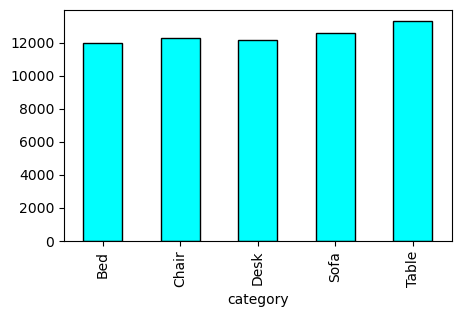

In [264]:
plt.figure(figsize=(5,3))
furtinure.groupby("category")["sales"].sum().plot.bar(color = 'cyan' , edgecolor = "black")
plt.show()

#### All 5 category perform almost same but Table Sales slightly more with compare to other Four category

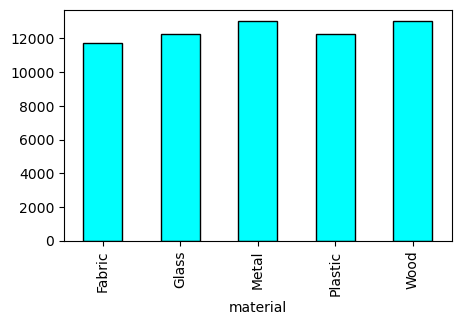

In [267]:
plt.figure(figsize=(5,3))
furtinure.groupby("material")["sales"].sum().plot.bar(color = 'cyan' , edgecolor = "black")
plt.show()

#### All 5 perform same just Metal and Wood slightly high sales

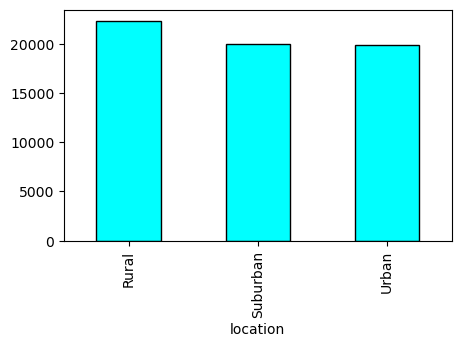

In [270]:
plt.figure(figsize=(5,3))
furtinure.groupby("location")["sales"].sum().plot.bar(color = 'cyan' , edgecolor = "black")
plt.show()

#### Rural Area has high sales compare to suburban and urban

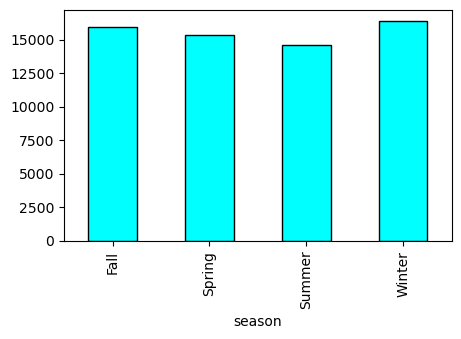

In [273]:
plt.figure(figsize=(5,3))
furtinure.groupby("season")["sales"].sum().plot.bar(color = 'cyan' , edgecolor = "black")
plt.show()

#### In Winter season sales incrase as compare with other seasons

In [276]:
furtinure.columns

Index(['price', 'cost', 'sales', 'profit_margin', 'category', 'material',
       'color', 'location', 'season', 'store_type', 'brand', 'revenue'],
      dtype='object')

# Revenue VS Categorical Feature

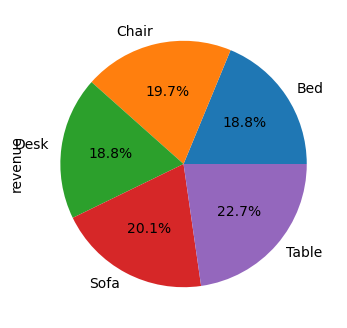

In [279]:
plt.figure(figsize=(5,4))
furtinure.groupby("category")["revenue"].sum().plot.pie(autopct= "%1.1f%%")
plt.show()

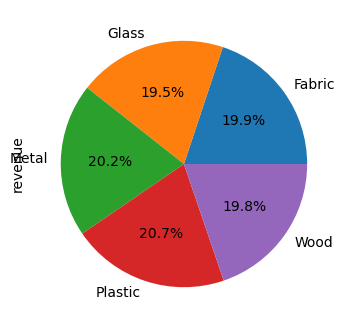

In [281]:
plt.figure(figsize=(5,4))
furtinure.groupby("material")["revenue"].mean().plot.pie(autopct= "%1.1f%%")
plt.show()

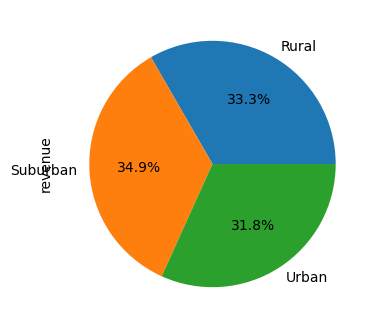

In [283]:
plt.figure(figsize=(5,4))
furtinure.groupby("location")["revenue"].mean().plot.pie(autopct= "%1.1f%%")
plt.show()

## Finding Pattern is there any pattern in Sales with respect to Season

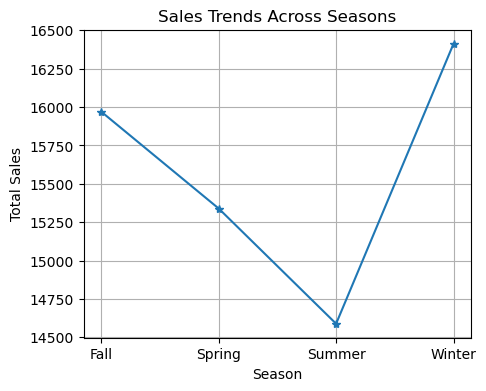

In [286]:
plt.figure(figsize=(5,4))
plt.plot(furtinure.groupby("season")["sales"].sum(), marker='*', linestyle='-')
plt.xlabel("Season")
plt.ylabel("Total Sales")
plt.title("Sales Trends Across Seasons")
plt.grid()
plt.show()

## Convert Categorical into numerical one

In [289]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_cols = ["category", "material", "location", "season", "store_type", "brand", "color"]

for col in categorical_cols:
    furtinure[col] = encoder.fit_transform(furtinure[col])

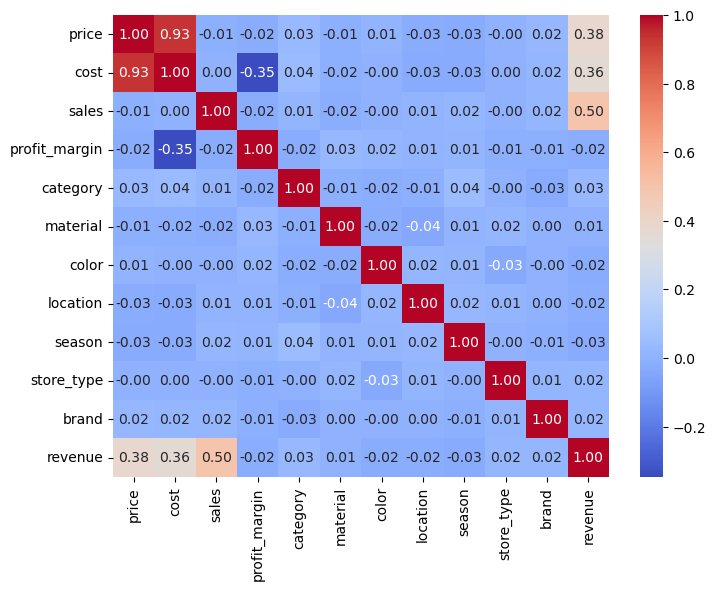

In [291]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(furtinure.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [293]:
furtinure["unit_price"] = furtinure["revenue"] / furtinure["sales"]

In [307]:
!pip install xgboost

  Using cached xgboost-2.1.4-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.4-py3-none-win_amd64.whl (124.9 MB)


In [309]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
print("New R² Score:", r2_score(y_test, y_pred))

New R² Score: 0.9756119251251221


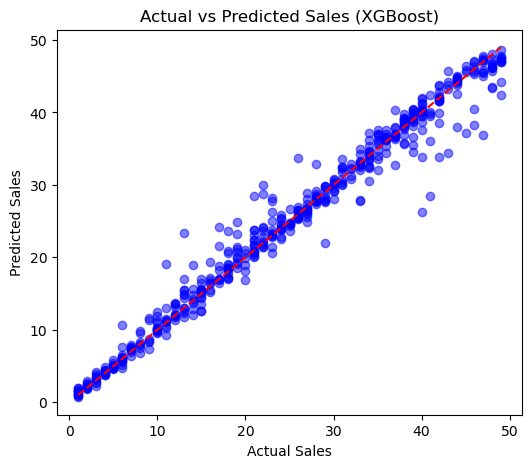

In [311]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # Perfect prediction line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (XGBoost)")
plt.show()
